# 1. Введение
В этой практике мы происследуем [набор данных Seattle Airbnb](https://www.kaggle.com/datasets/airbnb/seattle) из Kaggle. Мы будем следовать общеотраслевому стандартному процессу интеллектуального анализа данных ([CRISP-DM](http://www.crisp-dm.org)), который состоит из следующих этапов:
1. Понимание бизнеса
2. Понимание данных
3. Подготовка данных
4. Моделирование
5. Оценка результата
6. Внедрение (деплой)

## 1 Business Understanding
<a id="business-understanding"></a>

Airbnb — это платформа, которая позволяет владельцам домов и квартир сдавать свою недвижимость в краткосрочную аренду гостям. Этот сервис стал одним из лучших вариантов для путешественников благодаря своему удобству и гибкости.

Датасет представляет собой набор списков недвижимости и их ключевых атрибутов, таких как размер объектов, наличие удобств, описание района, отзывы клиентов и многое другое.

По датасету доступна справка с официального сайта [Inside Airbnb](http://insideairbnb.com/data-assumptions/).

В данном ноутбуке мы попробуем полностью происследовать данные и изучить их без прямого использования методов машинного обучения.

Импортируем все нужные нам библиотеки:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import skew
from scipy import stats
import statsmodels.stats.multitest as multi


<a id="data-understanding"></a>
# 2 Data Understanding


Начнем с изучения данных. Основная цель этой стадии — получить полное представление о данных, их качестве и структуре, а также выявить потенциальные проблемы, связанные с ними (выбросы, NaN, несбалансированность классов).


Настроим отображение `DataFrame` на экране с помощью функции [`pd.set_option`](https://pandas.pydata.org/docs/reference/api/pandas.set_option.html):

In [23]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
warnings.filterwarnings("ignore")

### **[Задание 1]**

Загрузите датасет `listings.csv`

In [72]:
df = pd.read_csv('listings.csv')
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,...,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,...,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...,NaN,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,...,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


<a id="data-preparation"></a>
# 3 Подготовка данных


<a id="data-wrangling"></a>
## 3.1 Data Wrangling

На прошлом занятии мы разобрали основные методы работы с библиотекой `pandas`, теперь мы расширим наш арсенал методов для работы с данными.

Помимо этого мы будем давать задания, которые потребуют поиска подходящих функций из библиотек, чтобы вы не боялись искать методы для решения заданий в документации самостоятельно.

Начнем с метода [`pd.drop_duplicates`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) для удаления повторов в `DataFrame`.

In [73]:
df_listings = df.T.drop_duplicates().T
df_listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,...,4 weeks ago,t,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,...,today,t,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...,NaN,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,...,5 weeks ago,t,1,6,17,220,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/94146944/6...,NaN,9851441,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,...,6 months ago,t,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,NaN,NaN,https://a1.muscache.com/ac/pict

Теперь нужно удалить полностью пустые столбцы (столбцы содержащие только
значения `NaN`. Для этого отлично подойдет метод [`pd.dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna):

In [74]:
df_listings.dropna(axis=1,how="all",inplace=True)

### **[Задание 2]**

Удалите столбцы, содержащие url-ссылки.

Подсказка: здесь можно попробовать использовать регулярные выражения, а можно найти метод из библиотеки `pandas`


In [75]:
df_listings = df_listings.loc[:, ~df_listings.applymap(lambda x: 'http' in x if isinstance(x, str) else False).any()]
df_listings

,id,scrape_id,last_scraped,name,experiences_offered,transit,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,none,NaN,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,100%,f,Queen Anne,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,365,4 weeks ago,t,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,none,"Convenient bus stops are just down the block, ...",5177328,Andrea,2013-02-21,"Seattle, Washington, United States",within an hour,98%,100%,t,Queen Anne,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,90,today,t,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,none,A bus stop is just 2 blocks away. Easy bus a...,16708587,Jill,2014-06-12,"Seattle, Washington, United States",within a few hours,67%,100%,f,Queen Anne,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,30,5 weeks ago,t,1,6,17,220,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,20160104002432,2016-01-04,Queen Anne Chateau,none,NaN,9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,f,Queen Anne,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1125,6 months ago,t,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,none,The nearest public transit bus (D Line) is 2 b...,1452570,Emily,2011-11-29,"Seattle, Washington, United States",within an hour,100%,NaN,f,Queen Anne,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1125,7 weeks ago,t,30,60,90,365,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,none,NaN,31148752,Bo,2015-04-13,US,within a few hours,99%,100%,f,Holly,354.0,"['email', 'phone', 'linkedin', 'reviews', 'jum...",t,t,"Northwest 48th Street, Seattle, WA 98107, Unit...",Fremont,Fremont,Other neighborhoods,Seattle,WA,...,1125,today,t,18,32,32,32,1,2015-09-27,2015-09-27,80.0,8.0,10.0,4.0,8.0,10.0,8.0,f,WASHINGTON,f,strict,f,f,8,0.3
3814,8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,none,Uber and Car2go are good opt

### **[Задание 3]**

Взгляните на столбцы со значениями в денежных единицах (`df_listings.price`, `df_listings.weekly_price`, `df_listings.monthly_price`, `df_listings.security_deposit`, `df_listings.cleaning_fee`, `df_listings.extra_people`). Значения в них строковые и тяжело работать. Нужно избавиться от знака доллара и запятой и привести данные к типу `float32`.
Для этого стоит обратиться к функциям `pd.replace`, `pd.astype`.

Например, можно попробовать такой подход:
`df_listings.price = df_listings.price.str.replace(r"$","").str.replace(",","").astype("float32")`

In [76]:
f = lambda x: np.float32(x.replace(r"$","").replace(",","")) if isinstance(x, str) else x

df_listings[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']] = df_listings[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']].applymap(f)

df_listings[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,85.0,NaN,NaN,NaN,NaN,5.0
1,150.0,1000.0,3000.0,100.0,40.0,0.0
2,975.0,NaN,NaN,1000.0,300.0,25.0
3,100.0,650.0,2300.0,NaN,NaN,0.0
4,450.0,NaN,NaN,700.0,125.0,15.0
...,...,...,...,...,...,...
3813,359.0,NaN,NaN,NaN,230.0,0.0
3814,79.0,NaN,NaN,500.0,50.0,25.0
3815,93.0,450.0,NaN,250.0,35.0,20.0
3816,99.0,NaN,NaN,300.0,45.0,0.0


Теперь поработаем со столбцами `host_since_deltaDays`, `last_review_deltaDays` `first_review_deltaDays`, которые содержат строковые данные, которые подозрительно похожи на даты.

Преобразуем их к `Datetime` с помощью методов [`pd.Timestamp`](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html) и [`pd.to_datetime`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

In [77]:
# Вычленим столбцы с датами
df_listing_last_scraped = pd.Timestamp(df_listings.last_scraped[0])

# Преобразуем столбцы с датами
df_listings['host_since_deltaDays'] = (pd.to_datetime(df_listing_last_scraped)-pd.to_datetime(df_listings.host_since)).dt.days
df_listings['last_review_deltaDays'] = (pd.to_datetime(df_listing_last_scraped)-pd.to_datetime(df_listings.last_review)).dt.days
df_listings['first_review_deltaDays'] = (pd.to_datetime(df_listing_last_scraped)-pd.to_datetime(df_listings.first_review)).dt.days
df_listings

,id,scrape_id,last_scraped,name,experiences_offered,transit,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_since_deltaDays,last_review_deltaDays,first_review_deltaDays
0,241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,none,NaN,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,100%,f,Queen Anne,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07,1607.0,2.0,1525.0
1,953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,none,"Convenient bus stops are just down the block, ...",5177328,Andrea,2013-02-21,"Seattle, Washington, United States",within an hour,98%,100%,t,Queen Anne,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48,1047.0,6.0,868.0
2,3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,none,A bus stop is just 2 blocks away. Easy bus a...,16708587,Jill,2014-06-12,"Seattle, Washington, United States",within a few hours,67%,100%,f,Queen Anne,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1,6,17,220,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15,571.0,123.0,523.0
3,7421966,20160104002432,2016-01-04,Queen Anne Chateau,none,NaN,9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,f,Queen Anne,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN,789.0,NaN,NaN
4,278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,none,The nearest public transit bus (D Line) is 2 b...,1452570,Emily,2011-11-29,"Seattle, Washington, United States",within an hour,100%,NaN,f,Queen Anne,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,30,60,90,365,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,WASHINGTON,f,strict,f,f,1,0.89,1497.0,72.0,1273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,none,NaN,31148752,Bo,2015-04-13,US,within a few hours,99%,100%,f,Holly,354.0,"['email', 'phone', 'linkedin', 'reviews', 'jum...",t,t,"Northwest 48th Street, Seattle, WA 98107, Unit...",Fremont,Fremont,Other neighborhoods,Seattle,WA,...,18,32,32,32,1,2015-09-27,2015-09-27,80.0,8.0,10.0,4.0,8.0,10.0,8.0,f,WASHINGTON,f,strict,f,f,8,0.3,266.0,99.0,99.0
3814,8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,none,Uber an

Переформатируем столбцы `host_response_time`, `cancellation_policy` и `host_response_rate`.
Для этого воспользуемся методом [`map`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html?highlight=map#pandas.Series.map).

Для начала заменим строковые элементы `"within an hour"`, `"within a few hours"`, `"within a day"`, `"a few days or more"` на числа 1, 12, 24  и 48 соответственно.


In [78]:
# Переформатируем признаки
df_listings['host_response_time'] = df_listings.host_response_time.map({"within an hour":1,"within a few hours":12, "within a day":24,"a few days or more":48})


### **[Задание 4]**

Для столбца `cancellation_policy` замените строковые элементы `strict`, `moderate`, `flexible` на 0, 1, 2 соответственно



In [79]:
df_listings['cancellation_policy'] = df_listings.cancellation_policy.map({"strict":0,"moderate":1, "flexible":2})

### **[Задание 5]**

Для столбца `host_response_rate` избавьтесь от знака процента и приведите столбец к типу `float32`



In [80]:
# df_listings['host_response_rate'] = df_listings['host_response_rate'].replace({'%': ''}, regex=True).astype('float32')
df_listings['host_response_rate'] = df_listings['host_response_rate'].replace({'%': ''}, regex=True).astype('float32')

# isinstance(df_listings['host_response_rate'][0], float32)

Выберем столбцы, которые непосредственно относятся к владельцу жилья:

In [82]:
features_host = ['host_is_superhost','host_about','host_response_time','host_response_rate', 'host_listings_count','host_has_profile_pic','host_identity_verified','host_since_deltaDays', 'calculated_host_listings_count']

features_property = ['summary','space','description','neighborhood_overview','notes','transit',
                     'street','neighbourhood','zipcode','latitude','longitude','is_location_exact',
                     'property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type',
                     'amenities','square_feet','price','weekly_price','security_deposit','cleaning_fee',
                     'guests_included','extra_people','minimum_nights','maximum_nights']

features_traveler = ['number_of_reviews','last_review_deltaDays','first_review_deltaDays','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value','instant_bookable','cancellation_policy', 'require_guest_profile_picture','require_guest_phone_verification','reviews_per_month']

features = features_host + features_property + features_traveler
df_listings_filtered = df_listings[features]


KeyError: "['host_about', 'summary', 'space', 'description', 'neighborhood_overview', 'notes'] not in index"

Выберем в нем фичи, которые нам интересны:

In [83]:
numeric_feature = ['host_listings_count','calculated_host_listings_count','latitude','longitude','accommodates','bathrooms',\
                   'bedrooms','beds','guests_included','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating',\
                   'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',\
                   'review_scores_location','review_scores_value', 'review_scores_rating' ,'review_scores_accuracy',\
                   'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',\
                   'review_scores_value' ,'reviews_per_month']



bool_feature = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable',\
                'require_guest_phone_verification','require_guest_profile_picture']


### **[Задание 6]**

Преобразуйте выбранные столбцы с численными значениями к типу `float32`

In [ ]:
# Преобразуем численные фичи

### **[Задание 7]**

Преобразуйте булевы столбцы к численному типу, где `1` - `True`, а `0` - `False`


In [ ]:
# Преобразуем булевы фичи

Теперь попробуем разобраться с категориальными столбцами. Наиболее распространенный подход для преобразования данных подобного типа - быстрое кодирование или one-hot encoding.

Быстрое кодирование ([One-Hot Encoding](https://www.educative.io/blog/one-hot-encoding#what)) – процесс, с помощью которого категориальные переменные преобразуются в подходящую ​​для обработки форму.

### **[Задание 8]**

Реализуйте One-Hot Encoding для `unique_amenities` и добавьте этот преобразованный срез к `df_listings_filtered_amenities`.




Выберем фичи, которые относятся только к информации о хосте.

In [87]:

# features_host = ['host_is_superhost','host_about','host_response_time','host_response_rate', 'host_listings_count','host_has_profile_pic','host_identity_verified',\
features_host = ['host_is_superhost','host_response_time','host_response_rate', 'host_listings_count','host_has_profile_pic','host_identity_verified',\
                 'calculated_host_listings_count']

df_listings_filtered = df_listings[features_host]

In [88]:
df_listings_filtered.head()

,host_is_superhost,host_response_time,host_response_rate,host_listings_count,host_has_profile_pic,host_identity_verified,calculated_host_listings_count
0,f,12.0,96.0,3.0,t,t,2
1,t,1.0,98.0,6.0,t,t,6
2,f,12.0,67.0,2.0,t,t,2
3,f,NaN,NaN,1.0,t,t,1
4,f,1.0,100.0,2.0,t,t,1


<a id="fill-na"></a>
## 3.2 Работа с пропущенными значениями


Теперь вычислим среднее количество нулевых значений в столбцах и отсортируем в порядке убывания для того, чтобы понять какая доля столбцов имеет нулевые значения.

In [ ]:
print(df_listings_filtered_amenities.isna().mean().sort_values(ascending=False).head(50))

square_feet                    0.974594
security_deposit               0.511262
weekly_price                   0.473808
notes                          0.420639
neighborhood_overview          0.270299
cleaning_fee                   0.269775
transit                        0.244631
host_about                     0.224987
review_scores_accuracy         0.172342
review_scores_checkin          0.172342
review_scores_value            0.171818
review_scores_location         0.171556
review_scores_cleanliness      0.171032
review_scores_communication    0.170508
review_scores_rating           0.169460
last_review_deltaDays          0.164222
reviews_per_month              0.164222
first_review_deltaDays         0.164222
space                          0.149031
host_response_time             0.136983
host_response_rate             0.136983
neighbourhood                  0.108958
summary                        0.046359
bathrooms                      0.004191
zipcode                        0.001833


Столбцы, связанные с отзывами, демонстрируют похожее соотношение пропущенных значений - около 17%. Это позволяет предположить, что эти пропущенные значения в основном относятся к объектам без отзывов. Однако важно решить, стоит ли включать эти свойства в наш анализ.

У объектов без отзывов могут быть различные причины отсутствия оных. Это может быть связано с тем, что объекты недвижимости изначально непривлекательны, владелец размещает их для других целей или хост является новичком на платформе и находится на рынке недавно.

Чтобы оценить влияние включения этих объектов, мы изучим распределения по годам, в течение которых объекты с нулевыми отзывами были представлены на Airbnb. Этот анализ показал, что 42% этих объектов были представлены на платформе менее года. Чтобы уменьшить неопределенность в модели, мы исключим эти "выбросы" из дальнейшего анализа.

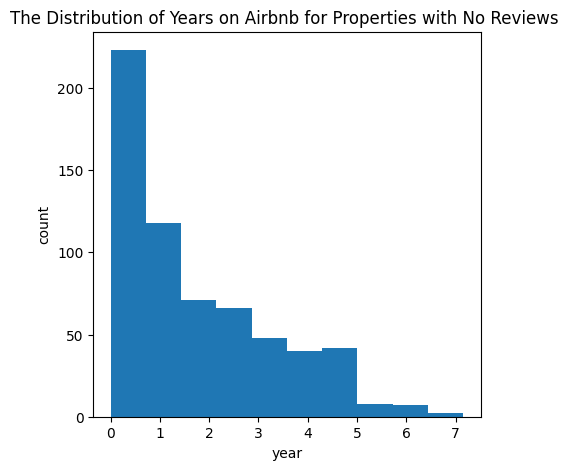

In [ ]:
f, axs = plt.subplots(1,1,figsize=(5,5))
(df_listings_filtered_amenities.query("number_of_reviews==0").host_since_deltaDays/365).plot(kind="hist")
ax = plt.gca()
ax.set_title("The Distribution of Years on Airbnb for Properties with No Reviews ")
ax.set_xlabel("year");
ax.set_ylabel("count");
f.show()

### **[Задание 9]**

Удалите строки датасета, для которых количество отзывов равно нулю

Чтобы обработать недостающие данные в нашем датасете, можно использовать несколько различных стратегий, в зависимости от типа данных каждого из них. Для **числовых характеристик**, таких как цены или рейтинги, можно заменить пропущенные значения медианой. Этот подход позволяет избежать искажения распределения переменной и влияния выбросов.

С другой стороны, для **категориальных признаков**, таких как тип свойства или район, можно заменить пропущенные значения наиболее часто встречающимся. Этот метод сохраняет распределение переменной и хорошо работает с номинальными или порядковыми данными.

In [ ]:
df_listings_filtered_amenities_cleaned = df_listings_filtered_amenities.copy()

df_listings_filtered_amenities_cleaned.zipcode = df_listings_filtered_amenities_cleaned.zipcode.fillna(
                                                df_listings_filtered_amenities_cleaned.zipcode.mode()[0])
feature_fillna_median = ['host_response_time','host_response_rate','security_deposit','cleaning_fee','weekly_price','bedrooms',
                         'bathrooms','review_scores_rating','review_scores_communication','review_scores_cleanliness','review_scores_location',
                         'review_scores_value','review_scores_accuracy','review_scores_checkin']

### **[Задание 10]**

Заполните датасет средними значениями метода `median`.

### **[Задание 11]**

Заполните столбцы `feature_fillna_empty =  ['summary','neighbourhood','space','host_about','transit','neighborhood_overview','notes']` пустыми строками.

In [ ]:
feature_fillna_empty =  ['summary','neighbourhood','space','host_about','transit','neighborhood_overview','notes']

Закодируем численные характеристики с помощью One-hot encoding.

In [ ]:
df_num = df_listings_filtered_amenities_cleaned.select_dtypes(exclude='object')

df_cat = pd.get_dummies(df_listings_filtered_amenities_cleaned.select_dtypes(include='object')[['property_type','room_type', 'bed_type']])

Для того, чтобы избавиться от незначащих данных мы избавимся от фичей, которые встречаются в менее чем 5% от элементов выборки.

In [ ]:
catFeatureToDrop = df_cat.columns.where(df_cat.mean()<0.05).dropna()
df_cat.drop(catFeatureToDrop,axis=1,inplace=True)
df_cat = df_cat.astype("bool")
df_total = pd.concat([df_num,df_cat],axis=1)

<a id="q1-test"></a>
#4 Two Sample Independent T-Test

Пока мы не использовали напрямую модели машинного обучения, мы попробуем происследовать зависимости в данных с помощью [The Two-Sample t-Test](https://www.jmp.com/en_ch/statistics-knowledge-portal/t-test/two-sample-t-test.html).

The Two-Sample t-Test - это статистический тест, который позволяет сравнить средние значения двух независимых выборок и определить, статистически значимо ли это различие.  Он основывается на t-статистике и используется в случаях, когда мы хотим сравнить средние значения двух групп или двух наблюдаемых условий. Например, тест можно использовать для сравнения среднего балла экзамена у двух различных групп студентов или для определения, есть ли значимое различие в среднем уровне зарплаты мужчин и женщин.

Мы заблаговременно реализовали его для вас, чтобы уже на этом занятии получить интересные результаты.

In [ ]:
def ttest(df,group_feature, test_feature):
    flag0 = df[group_feature]==False
    flag1 = ~flag0
    vector_0 = df.loc[flag0,test_feature]
    vector_1 = df.loc[flag1,test_feature]
    statistic, pvalue = stats.ttest_ind(vector_1, vector_0)
    return [statistic,pvalue,test_feature]

In [ ]:
# Пробегаем по всем столбцам, кроме host_is_superhost
ttest_result = []
for col in df_total.columns:
    if col=="host_is_superhost":
        continue
    else:
        ttest_result.append(ttest(df_total,"host_is_superhost",col))

# Отображаем результаты
ttest_result = pd.DataFrame(ttest_result,columns=['statistics','pvalue','feature'])
# Применяем
multitest_result = multi.multipletests(ttest_result.pvalue,method="bonferroni")
ttest_result['significant'],ttest_result['adjust_pvalue']=multitest_result[0],multitest_result[1]
ttest_result.sort_values(['significant','adjust_pvalue'],ascending=[False,True]).style.bar(subset=['statistics'],
                                                                     align='zero', color=['#d65f5f', '#5fba7d'])

,statistics,pvalue,feature,significant,adjust_pvalue
36,15.911607,0.000000,reviews_per_month,True,0.000000
25,13.952008,0.000000,review_scores_rating,True,0.000000
22,13.477553,0.000000,number_of_reviews,True,0.000000
27,13.172330,0.000000,review_scores_cleanliness,True,0.000000
31,12.538164,0.000000,review_scores_value,True,0.000000
26,12.240080,0.000000,review_scores_accuracy,True,0.000000
28,9.388841,0.000000,review_scores_checkin,True,0.000000
29,9.174692,0.000000,review_scores_communication,True,0.000000
69,8.128337,0.000000,Shampoo,True,0.000000
1,7.705804,0.000000,host_response_rate,True,0.000000


### **[Задание 12 (Опционально)]**

Обучите любую другую модель на обработанных нами данных и попробуйте вычленить из них какую-нибудь бизнесовую закономерность

In [ ]:
# Здесь могла быть ваша домашка

<a id="q1-result"></a>
# 5 Результаты


In [ ]:
ttest_result.feature[ttest_result.significant==True].isin(unqiue_amenities).sum()/np.sum(ttest_result.significant==True)

0.45714285714285713

Давайте возьмем несколько важных фичей и визуализируем сравнение между ними.

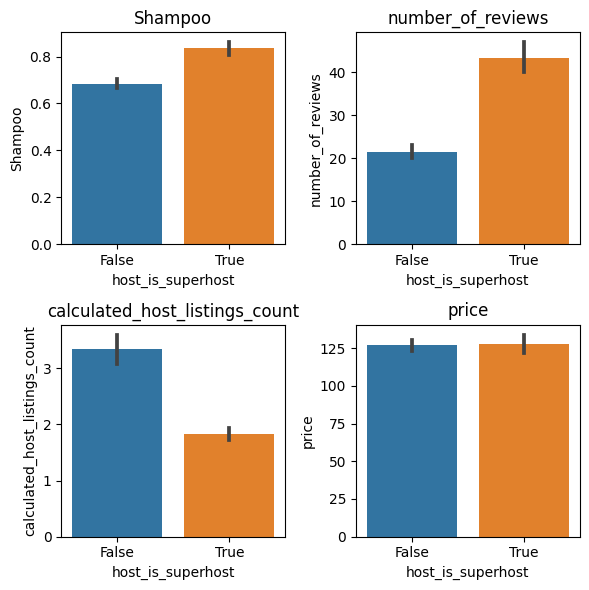

In [ ]:
matplotlib.rcParams['figure.figsize'] = (6,6)
plt.subplot(221)
sns.barplot(data=df_total,y="Shampoo",x="host_is_superhost")
plt.title("Shampoo")
plt.subplot(222)
sns.barplot(data=df_total,y="number_of_reviews",x="host_is_superhost")
plt.title("number_of_reviews")
plt.subplot(223)
sns.barplot(data=df_total,y="calculated_host_listings_count",x="host_is_superhost")
plt.title("calculated_host_listings_count")
plt.subplot(224)
sns.barplot(data=df_total,y="price",x="host_is_superhost")
plt.title("price")
plt.tight_layout()



In [ ]:
ttest_result

,statistics,pvalue,feature,significant,adjust_pvalue
0,-7.517356,7.221318e-14,host_response_time,True,5.993694e-12
1,7.705804,1.724127e-14,host_response_rate,True,1.431025e-12
2,-2.851064,4.385325e-03,host_listings_count,False,3.639820e-01
3,0.186417,8.521295e-01,host_has_profile_pic,False,1.000000e+00
4,7.014558,2.804709e-12,host_identity_verified,True,2.327909e-10
...,...,...,...,...,...
78,-2.573802,1.010354e-02,property_type_Apartment,False,8.385935e-01
79,2.092324,3.648845e-02,property_type_House,False,1.000000e+00
80,-0.522350,6.014629e-01,room_type_Entire home/apt,False,1.000000e+00
81,1.709696,8.741942e-02,room_type_Private room,False,1.000000e+00


Теперь давайте построим двумерный график связи между `statistics` и  `pvalue`, чтобы отследить взаимосвязь между ними:

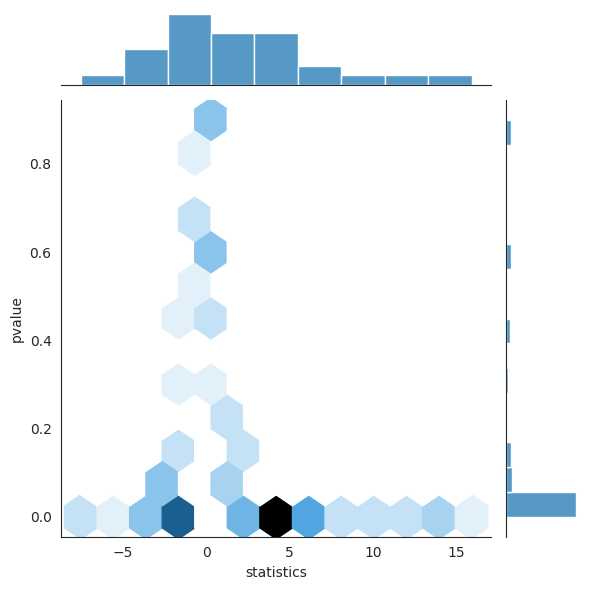

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x = 'statistics', y = 'pvalue', data=ttest_result, kind='hex')


#6 Сохранение и загрузка модели

А как запускать вашу прекрасную модель в продакшн?

Для этого нужно воспользоваться библиотекой [`joblib`](https://joblib.readthedocs.io/en/stable/), а именно ее методами [`dump`](https://joblib.readthedocs.io/en/stable/generated/joblib.dump.html) для выгрузки модели и [`load`](https://joblib.readthedocs.io/en/stable/generated/joblib.load.html) для загрузки.

Подключим нужные методы из библиотеки:

In [ ]:
from joblib import dump, load

Выгрузим модель. Передадим `dump` два параметра: нашу модель (сохраним ее в переменную `model`) и название файла для выгрузки c расширением `.joblib` (или путь до места сохранения файла)

In [ ]:
model = ttest_result.feature[ttest_result.significant==True].isin(unqiue_amenities).sum()/np.sum(ttest_result.significant==True)

In [ ]:
dump(model, 'model.joblib')

['model.joblib']

Теперь модель сохранена в файле, который мы можем, например, передать нашим коллегам для деплоя ее в продакшн:)

Если нам потребуется загрузить модель, то мы можем сделать это с помощью метода `load`, которому в качестве параметра передадим имя файла или путь до него в файловой системе. Загруженную модель передадим в объект `loaded_model`.

In [ ]:
loaded_model = load('model.joblib')

Загруженный объект теперь можно использовать для предсказаний.

В следующих темах мы подробнее познакомимся с способом экспорта и импорта моделей, а также их запуском после загрузки:)

<a id="conclusions"></a>
# 6. Выводы

Таким образом из нашего исследования можно заключить, что **супер-хосты получают больше отзывов и более высокие оценки по сравнению с другими хостами.** Это можно объяснить их быстрым откликом и заботой о безопасности.

При анализе признаков, которые существенно отличают суперхоста, было обнаружено, что почти половину из них составляют удобства. Интересно, что самым влиятельным признаком был `Shampoo`, в то время как `Kitchen` едва преодолел порог значимости. Это понятно, поскольку путешественники обычно имеют ограниченное время для приготовления пищи и отдают предпочтение хорошему приему душа и хорошему ночному сну.

Несмотря на качество супер-хозяев, можно предположить, что они сдают жилье по более высокой цене. Однако, по статистике, это не так.

Еще одной интересной фичей является `calculated_host_listings_count`, которая указывает на количество объектов недвижимости, принадлежащих хосту. Похоже, что компании и владельцы, владеющие несколькими объектами недвижимости, не могут уделять достаточного внимания каждому из них, в то время как супер-хосты обычно владеют только 1 или 2.